<a href="https://colab.research.google.com/github/safaa12/zen-city/blob/main/zen_city.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
rentals = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/zen_city_project/rentals.csv')
station_id = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/zen_city_project/station_info.csv')

Mounted at /content/drive


In [ ]:
station_id.head(5)

,station_id,name,status,location,address,alternate_name,city_asset_number,property_type,number_of_docks,power_type,footprint_length,footprint_width,notes,council_district,image,modified_date
0,1004,Red River & LBJ Library,closed,"(30.2848, -97.72756)",2322 Red River Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2021-01-04 00:00:00.000000 UTC
1,1005,State Parking Garage @ Brazos & 18th,closed,"(30.27907, -97.73715)",1789 Brazos St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2021-01-04 00:00:00.000000 UTC
2,2541,State Capitol @ 14th & Colorado,closed,"(30.27654, -97.74155)",206 W. 14th St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2021-01-04 00:00:00.000000 UTC
3,1007,Lavaca & 6th,closed,"(30.26889, -97.74525)",601 Lavaca St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,2021-01-04 00:00:00.000000 UTC
4,1002,6th & Navasota St.,closed,"(30.26383, -97.72864)",1308 W. 6th St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2021-01-04 00:00:00.000000 UTC


In [ ]:
rentals.head(5)


,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes
0,26166205,Local365,19608,electric,2022-03-15 13:13:59.000000 UTC,2547,21st/Guadalupe,2552.0,3rd/West,9
1,26017060,Pay-as-you-ride,2197,classic,2022-02-13 11:23:29.000000 UTC,2547,21st/Guadalupe,2552.0,3rd/West,25
2,26029611,Local31,23251,electric,2022-02-15 17:49:15.000000 UTC,2547,21st/Guadalupe,2552.0,3rd/West,42
3,25896788,Student Membership,19706,electric,2022-01-10 13:32:37.000000 UTC,2547,21st/Guadalupe,2552.0,3rd/West,10
4,26003292,Pay-as-you-ride,451,classic,2022-02-10 10:03:05.000000 UTC,2547,21st/Guadalupe,2552.0,3rd/West,49


##Facing a Business Topic:
The Business topics that we might be interesting in are:
1. how is the number of rides affected by seasonality?
2. how is the number of rides affected by Time of Day/Week?
3. how is the number of rides affected by user type?
4. how is the number of rides affected by maintainabilty of the stations network?
5. popularity by bike type (classic vs. electric)
6. how does the weather affect the number of rides?
7. Outlieres

In [ ]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10780 entries, 0 to 10779
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_id             10780 non-null  int64  
 1   subscriber_type     10780 non-null  object 
 2   bike_id             10780 non-null  object 
 3   bike_type           10780 non-null  object 
 4   start_time          10780 non-null  object 
 5   start_station_id    10780 non-null  int64  
 6   start_station_name  10780 non-null  object 
 7   end_station_id      10779 non-null  float64
 8   end_station_name    10780 non-null  object 
 9   duration_minutes    10780 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 842.3+ KB


In [ ]:
rentals['duration_minutes'].describe()

,duration_minutes
count,10780.000000
mean,22.061039
std,105.400269
min,2.000000
25%,4.000000
50%,6.000000
75%,12.000000
max,4874.000000


In [ ]:
rentals.shape
rentals['trip_id'].nunique()#cardinality of the column
#this means trip_id is primary key of this table
rentals.nunique()#cardinality of the column

#we can understand: there are only 7 stations that departs all the rides (out of 101 station)
#                   there is 80 end_station_ids and 82 end_station_names -> inconsistancy name-id of the end_stations -> need to investigate further

station_id.nunique()
#we can understand: there is one name missing
#                   there are 4 stations with missing address

#show the station id with the missing name
#shaow the stations with 'closed' status
#show the stations with the missing address ->calculate it from location value

,0
station_id,101
name,100
status,2
location,101
address,97
alternate_name,2
city_asset_number,75
property_type,5
number_of_docks,12
power_type,2


here we notice: inconsistancy in data types (for BQ)
- start time is a string not timestamp (in BQ it is a timestamp.
- end_station_id is float --> need to convert to int64 (in BigQuery it's string not float)

**also for station_id!!!

**The answer:**
If your BQ string column contains numerical data and NULLs, Pandas converts the numeric entries to floats and the NULLs to NaN.

In [ ]:
station_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         101 non-null    int64  
 1   name               101 non-null    object 
 2   status             101 non-null    object 
 3   location           101 non-null    object 
 4   address            100 non-null    object 
 5   alternate_name     2 non-null      object 
 6   city_asset_number  77 non-null     float64
 7   property_type      81 non-null     object 
 8   number_of_docks    81 non-null     float64
 9   power_type         81 non-null     object 
 10  footprint_length   79 non-null     float64
 11  footprint_width    79 non-null     float64
 12  notes              31 non-null     object 
 13  council_district   101 non-null    int64  
 14  image              0 non-null      float64
 15  modified_date      101 non-null    object 
dtypes: float64(5), int64(2), o

In [ ]:
missing_station_mask = station_id.isna().sum()
missing_station_mask
#number_of_docks	20 nulls
missing_rentals_mask = rentals.isna().sum()
missing_rentals_mask

,0
trip_id,0
subscriber_type,0
bike_id,0
bike_type,0
start_time,0
start_station_id,0
start_station_name,0
end_station_id,1
end_station_name,0
duration_minutes,0


In [ ]:
station_id['number_of_docks'].describe()

,number_of_docks
count,81.000000
mean,13.580247
std,2.827827
min,9.000000
25%,12.000000
50%,13.000000
75%,15.000000
max,22.000000


In [ ]:
station_id.shape

(101, 16)

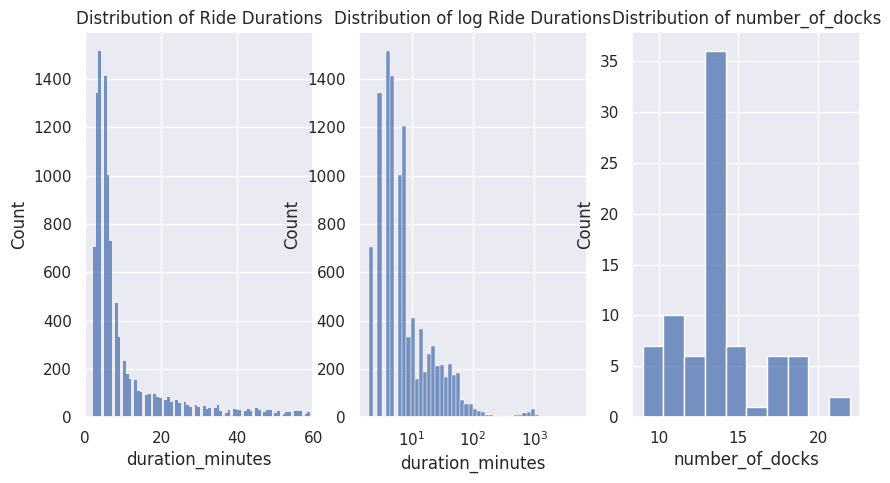

In [ ]:
#distribution of numeric variables:
#distribution of ride_duration: overall, we can see short rides (less than 10 mins) are more frequent. (ignoring the outliers)
plt.figure(figsize=(10,5))
ax = plt.subplot(1,3,1)

sns.histplot(rentals['duration_minutes'])
#plt.xlim(60) #result:axis x was opposit (it started from 60 and down)
ax.set_xlim(0,60)
plt.title('Distribution of Ride Durations')
#we can see the data distribution is skewd right

# - we can also use log(rentals['duration_minutes']) without ignoring the outliers.
plt.subplot(1,3,2)
sns.histplot(
    data=rentals,
    x='duration_minutes',
    log_scale=True,
    bins=50
)
plt.title('Distribution of log Ride Durations')# to see the whole picture without getting rid of the outliers
plt.subplot(1,3,3)
#distribution of number of docks: most stations have 12.5-15 docks
sns.histplot(station_id['number_of_docks'])
plt.title('Distribution of number_of_docks')
plt.show()

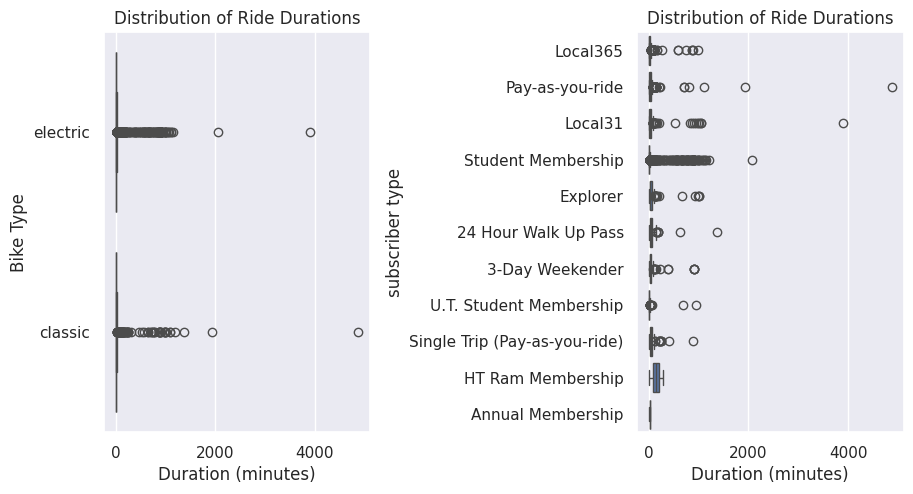

In [ ]:
plt.figure(figsize=(10,5))
duration_bikeType = plt.subplot(1,2,1)
sns.boxplot(x=rentals['duration_minutes'], y=rentals['bike_type']) # Use 'y' for vertical, 'x' for horizontal
plt.title('Distribution of Ride Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Bike Type')

duration_bikerType = plt.subplot(1,2,2)
sns.boxplot(x=rentals['duration_minutes'], y=rentals['subscriber_type']) # Use 'y' for vertical, 'x' for horizontal
plt.title('Distribution of Ride Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('subscriber type')

plt.subplots_adjust(
    wspace=1,  # רווח אופקי בין הגרפים (Width space)
    hspace=0.5,  # רווח אנכי בין הגרפים (Height space - לא רלוונטי בדוגמה 1x2)
    left=0.1,    # רווח משמאל
    right=0.9,   # רווח מימין
    top=0.9,     # רווח מלמעלה
    bottom=0.1   # רווח מלמטה
)
plt.show()

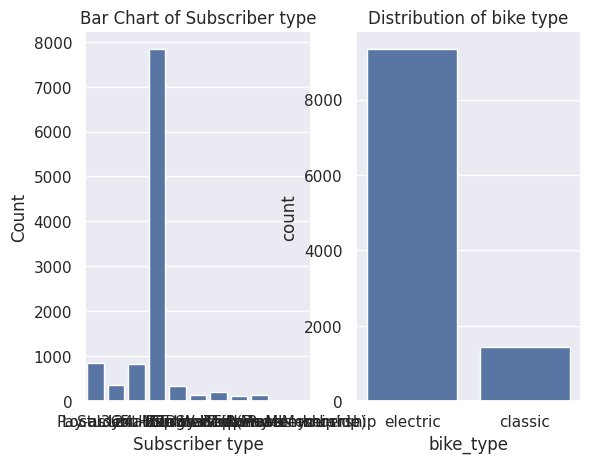

In [ ]:
#distribution of catagorical variables:
#distribution of subscriber_type:
plt.subplot(1,2,1)
sns.countplot(x='subscriber_type', data=rentals)
plt.title('Bar Chart of Subscriber type')
plt.xlabel('Subscriber type')
plt.ylabel('Count')
plt.subplot(1,2,2)
#distribution of bike type: preference of riders
sns.countplot(x='bike_type', data=rentals)
plt.title('Distribution of bike type')
plt.show()

Addressing the Business topics:

calculate seasonality
calculate Time of Day/Week
number of rides by user type
maintainabilty of the stations network
popularity by bike type (classic vs. electric)
how does the weather affect the number of rides - NOT ENOUGH DATA
Outlieres
MODE

Data cleaning and Wrangling

In [ ]:
# 80 end_station_id vs. 82 end_station_name
unique_start_stations = rentals['start_station_id'].unique()
unique_end_stations = rentals['end_station_id'].unique()
unique_end_stations

#rentals records: there is one missing end station id for the name = 'Springfest 2022'
mask_missing_id = rentals[rentals['end_station_id'].isna() == True]
mask_missing_id #showing the station with the missing id
#what's the second missing end_station_id --> doing merge maybe?????

,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes
3112,26160487,Pay-as-you-ride,1834,classic,2022-03-14 15:39:24.000000 UTC,3797,21st/University,NaN,Springfest 2022,12


In [ ]:
#80 end_stations_id vs. 82 end_station_name???????????????
#There was only 77 active stations --> how come there's 80 end stations
#pd.merge(left, right, on="end_station_id")

In [ ]:
# 4 station addresses missing - address.nunique = 97 out of 101

mask_missing_address = station_id[station_id['address'].isna() == True]
mask_missing_address
#station_id records: there is one station WITH missing address in station_id table
address_dups = station_id.groupby('address')['station_id'].count()
address_dups
address_dups.sort_values(ascending=False)
# Barton Springs Rd	--> 2
# Presented by Austin Parks Foundation	--> 2
# 601 Lavaca St.	--> 2
#--> which means 3 more missing address (3 different addresses duplicated) + the null address ==> 101 stations

#There is one station name missing from station_id table --> not null so it must've been duplicate
mask_missing_name = station_id[station_id['name'].isna() == True]
mask_missing_name
name_dups = station_id.groupby('name')['station_id'].count()
name_dups.idxmax()
# name_dups_sorted = name_dups.sort_values(ascending=False)
# name_dups_sorted.idxmax()

In [ ]:
#show the stations with the missing address ->calculate it from location value
#Reverse Geocoding (Coordinates to Address)

In [ ]:
# #Calculating seasonality by start_time of rentals table
# chk_datetime = pd.to_datetime(rentals['start_time'])
# chk_datetime
# non_timestamp_rows = rentals['start_time'].isna()
# non_timestamp_rows
# num_non_timestamp = pd.value_counts(non_timestamp_rows)
# num_non_timestamp
# #this means there is no invalid dtaetime data

# rentals['day_of_week'] = rentals['start_time'].dt.day_name()

# Step 2: Apply the .dt.day_name() method
rentals.start_time.dt.day_name()

print(rentals)
# day_of_week


AttributeError: Can only use .dt accessor with datetimelike values